# Introduction  <a id='introduction'></a>

This notebook contains Python code for a multivariate linear regression task. Multivariate linear regression means linear regression with more than one variable. In addition to Python, we will also use Pandas, Numpy, and Matplotlib libraries. 

In my [Univariate Linear Regression from Scratch](https://www.kaggle.com/code/erkanhatipoglu/univariate-linear-regression-from-scratch) notebook, we have already seen basic Machine Learning concepts such as the hypothesis, cost function, and gradient descent. We will not explain those concepts in this notebook. Anyone interested may refer to my Kaggle notebook [Univariate Linear Regression from Scratch](https://www.kaggle.com/code/erkanhatipoglu/univariate-linear-regression-from-scratch) or my Medium blog post [Univariate Linear Regression from Scratch](https://medium.com/towards-artificial-intelligence/univariate-linear-regression-from-scratch-68065fe8eb09) published in [Towards AI](https://pub.towardsai.net/) for a more detailed explanation. Refer to my [Multivariate Linear Regression From Scratch](https://medium.com/towards-artificial-intelligence/multivariate-linear-regression-from-scratch-c6702e26cce0https://medium.com/towards-artificial-intelligence/multivariate-linear-regression-from-scratch-c6702e26cce0) blog post on Medium for more detailed discussions on concepts of this notebook. We will use a gradient descent solution and not discuss the 'normal equation.' The  'normal equation' is explained in the [Linear Regression Using the Normal Equation](https://www.kaggle.com/code/erkanhatipoglu/linear-regression-using-the-normal-equation) notebook.

This notebook is greatly inspired by the famous Machine Learning course by [Andrew Ng](https://www.andrewng.org/). All the mistakes, if any, are made by me.

Finally, thanks to [@Mohan S Acharya](https://www.kaggle.com/mohansacharya) for this dataset.


# Table of Contents
* [Introduction](#introduction)
* [Vectorization](#vector)
* [Helper functions](#functions)
* [The Hypothesis](#hypothesis)
* [The Cost Function](#cost)
* [Gradient Descent](#gradient)
* [Feature Scaling](#scaling)
* [Loading Data](#getdata)
* [Model Training](#training)
* [Model Validation](#validation)
* [Conclusion](#conclusion)
* [References](#references)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.model_selection import train_test_split # Split data into train and validation sets
import matplotlib.pyplot as plt # Data visualization
from time import process_time # Calculate elapsed CPU time

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


# Vectorization   <a id='vector'></a>   

<div class="alert alert-block alert-info">
<b>Tip:</b> Instead of using loops in our Machine Learning functions, we can take advantage of matrices and vectors found in linear algebra libraries that are either built-in to a programming language or easily accessible. This concept is called vectorization.

Those linear algebra libraries are generally well-written and highly optimized. So, by using them, our code will be more efficient and more straightforward. In this notebook, we will use the [NumPy](https://numpy.org/) and [Pandas](https://pandas.pydata.org/) libraries in Python for this purpose.
</div>



# Helper Functions   <a id='functions'></a>   

<div class="alert alert-block alert-info">
<b>Tip:</b> We will use some helper functions throughout the notebook. Collecting them in one place is a good idea, making the code more organized. First, we will define and explain those functions and then use them in our code.
</div>

# The  Hypothesis   <a id='hypothesis'></a>   

The hypothesis for a linear regression task with multiple variables is of the form: 


$\hat{y} = h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$


Where $\hat{y} = h_\theta(x)$ is the predicted target. The hypothesis will calculate the predicted values (or predicted targets) for a given set of inputs and $\theta$ values ($\theta_i$, where $i = 0,1,2,...,n$). 


Using vector notation, this equation can be rewritten as: 


$ h_\theta(x) = \begin{bmatrix}\theta_{0} & \theta_{1} & \cdots & \theta_{n}
\end{bmatrix} \begin{bmatrix}x_{0}\\
x_{1}\\
\vdots\\
x_{n}
\end{bmatrix}= \boldsymbol{\theta}^T\boldsymbol{x}$

assuming $ \boldsymbol{\theta}$ and $\boldsymbol{x}$ are column vectors and $\boldsymbol{x_0 = 1}$.

Each row in our dataset represents a sample such that:

$ \boldsymbol{X} = \begin{bmatrix}x_{0}^{(1)} & x_{1}^{(1)} & \cdots  & x_{n}^{(1)} \\
x_{0}^{(2)} & x_{1}^{(2)} & \cdots  & x_{n}^{(2)}\\
\vdots & \vdots & \vdots  & \vdots\\
x_{0}^{(m)} & x_{1}^{(m)} & \cdots  & x_{n}^{(m)}
\end{bmatrix} and;$ 

$ \boldsymbol{\theta} = \begin{bmatrix}\theta_{0} \\
\theta_{1}\\
\vdots \\
\theta_{n}
\end{bmatrix}$

Where $ \boldsymbol{X} $ is the training or test dataset, $ \boldsymbol{\theta} $ is the $ \theta $ vector, m is the number of samples, and n is the number of features. As a result, we can calculate the hypothesis as a column vector of $ (m x 1) $ as follows: 

$ h_\theta(x) = \boldsymbol{X}\boldsymbol{\theta} $

In [2]:
# The hypothesis
def h(x, theta):
    """
     Calculates the predicted values (or predicted targets) for a given set of input and theta vectors.
    
    :param x: inputs (feature values) - data frame of floats 
    :param theta: theta vector (weights) - Numpy array of floats
    
    :return: predicted targets - Numpy array of floats
    
    """
    # The hypothesis is a column vector of m x 1
    return np.dot(x, theta)

# The  Cost Function   <a id='cost'></a> 

We will use the squared error cost function as in the univariate linear regression case. Therefore, the cost function is:

$ J(\theta) = \frac{1}{2m}\sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^i)^2 $

where $m$ is the number of examples, $h_\theta()$ is the hypothesis function, $ x^i $ is the $i^{th}$ training example, and $y^i$ is the actual output of $i^{th}$ training example. And the vectorized form of the cost function is as follows:

$ J(\theta) = \frac{1}{2m}( X\theta - \vec y)^T(X\theta - \vec y) $

where $m$ is the number of examples, $X$ is the training or test dataset, $ \boldsymbol{\theta} $ is the $ \theta $ vector, $\vec y$ is the vector of corresponding $y$ values, and $()^T$ is the transpose of the matrix. 

In [3]:
# The cost function

def J(X,y,theta):
    """
     Calculates the total error using squared error function.
    
    :param X: inputs (feature values) - data frame of floats
    :param y: outputs (actual target values) - Numpy array of floats
    :param theta: theta vector (weights) - Numpy array of floats
    
    :return: total error - float
    
    """
    # Calculate number of examples
    m = len(X)
    
    # Calculate the constant
    c = 1/(2 * m)
       
    # Calculate the array of errors
    temp_0 = h(X, theta) - y.reshape(-1)

    # Calculate the transpose of array of errors
    temp_1 = temp_0.transpose()

    # Calculate the dot product 
    temp_2 = np.dot(temp_1, temp_0) 

    return  c * temp_2

# Gradient Descent   <a id='gradient'></a> 

The gradient descent calculation is similar to what we have seen in the [univariate version](https://www.kaggle.com/code/erkanhatipoglu/univariate-linear-regression-from-scratch?kernelSessionId=106646889):

$  \text{repeat  until  convergence:  \{} $

$\theta_0 := \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)}).x_0^{(i)}$

$\theta_1 := \theta_1 - \alpha\frac{1}{m}\sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)}).x_1^{(i)}$

$\theta_2 := \theta_2 - \alpha\frac{1}{m}\sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)}).x_2^{(i)}$

$\cdots $

$\theta_n := \theta_n - \alpha\frac{1}{m}\sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)}).x_n^{(i)}$

$  \text{ \}}$

where

$n$ is the number of features,

$\theta_j$ (for $j = 0,1,2,\cdots,n$) is the corresponding weights for each feature, 

$\alpha$ is the learning rate, 

$m$ is the number of examples, 

$h_{\theta}(x^{(i)})$ is the result of the hypothesis function for the $i^{th}$ training example, 

$y^{(i)}$ is the actual value for the $i^{th}$ training example,

and $x_k^{(i)}$ (for $k = 0,1,2,\cdots,n$) is the value of the $k^{th}$ feature for the $i^{th}$ training example.



Therefore, the vectorized form of the gradient descent is as follows: 

$ \boldsymbol{\theta} := \boldsymbol{\theta} - \frac{\alpha}{m} \boldsymbol{X}^T (\boldsymbol{X}\boldsymbol{\theta} - \vec y) $

where $ \boldsymbol{\theta} $ is the $ \theta $ vector, $\alpha$ is the learning rate, $m$ is the number of examples, $X$ is the training or test dataset, $()^T$ is the transpose of the matrix, and $\vec y$ is the vector of corresponding $y$ values.

In [4]:
# Gradient descent function
def gradient(X, y, theta, alpha):
    """
     Calculates the gradient descent.
    
    :param X: inputs (feature values) - data frame of floats
    :param y: outputs (actual target values) - Numpy array of floats
    :param theta: theta vector (weights) - Numpy array of floats
    :param alpha: learning rate
    
    :return: new theta - Numpy array of floats
    
    """
    # Calculate number of examples
    m = len(X)
    
    # Calculate the constant
    c =  alpha / m
        
    # calculate the transpose of X
    temp_0 = X.transpose()
        
    # Calculate the array of errors
    temp_1 = h(X, theta) - y.reshape(-1) 
        
    # Calculate the dot product 
    temp_2 = np.dot(temp_0, temp_1)
        
    return theta - (c * temp_2)

# Feature Scaling  <a id='scaling'></a>

<div class="alert alert-block alert-info">
<b>Tip:</b> Making the feature values approximately the same scale (i.e., a similar range of values) speeds up the gradient descent. Therefore in this notebook, we will scale some features in our dataset.
</div>

There are various techniques for scaling; we will present three of them:

**Standardization:** $\frac{X-X.mean}{X.std}$

**Mean Normalization** $\frac{X-X.mean}{X.max - X.min}$

**Min-Max Scaling:** $\frac{X-X.min}{X.max - X.min}$

In [5]:
# Normalization and Standardization
def normalize(X, columns):
    """
     Applies feature scaling to the dataframe.
    
    :param X: unnormalized features - data frame of floats
    :param columns: columns to be scaled - list of strings
    
    :return: normalized features - data frame of floats
    
    """
    
    for column in columns:
        
        # Use this if you want Z-Score Normalization (or Standardization).
        # Note that you must play with the learning rate
        # and convergence threshold for better results.        
        # X[column] = (X[column] - X[column].mean()) / X[column].std()
        
        # Use this if you want Mean Normalization.
        # Note that you must play with the learning rate
        # and convergence threshold for better results.        
        # X[column] = (X[column] - X[column].mean()) / (X[column].max() - X[column].min()) or
                
        # Use this if you want Min-Max Scaling (or Min-Max Normalization).
        # Note that you must play with the learning rate
        # and convergence threshold for better results.  
        # X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min())
        
        # We will use Min-Max Scaling.
        X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min())
        
    return X

# Loading Data   <a id='getdata'></a> 

First of all, we will load the CSV file in this part. Since there are two different versions of the dataset, we will load the one with more data. We will then create our training DataFrame and target vector. Next, we will normalize some columns of the training DataFrame using min-max scaling. Finally, we will split our data into training and validation DataFrames so that we can validate the results.

In [6]:
# Get the data. Note that there are two versions. We will use the one
# with the most rows.

train_data = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

# Set X and y
X = train_data.drop(['Chance of Admit ', 'Serial No.'], axis=1) # Chance of Admit is the target variable and Serial No. is the order. So we drop them.
y = pd.DataFrame(data = train_data['Chance of Admit ']).to_numpy()

# Select columns to be scaled
columns = ['GRE Score', 'TOEFL Score', 'CGPA']

# Min-max scaling
X = normalize(X, columns)

# Instead of finding probabilities, we want to calculate the percentages.
y = y * 100

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state = 0)

X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
107,0.96,0.892857,4,3.5,4.5,0.852564,1
336,0.58,0.642857,3,3.0,2.5,0.637821,0
71,0.92,0.714286,5,5.0,5.0,0.948718,1
474,0.36,0.464286,4,3.0,2.5,0.368590,1
6,0.62,0.607143,3,3.0,4.0,0.448718,1


In [7]:
X_valid.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
90,0.56,0.500000,2,4.0,4.0,0.358974,1
254,0.62,0.785714,4,4.0,5.0,0.743590,0
283,0.62,0.678571,3,2.5,3.0,0.673077,1
445,0.76,0.857143,5,4.5,5.0,0.730769,1
461,0.22,0.357143,3,2.5,2.0,0.426282,1


# Model Training   <a id='training'></a> 

As discussed in [The Hypothesis](#hypothesis) part, we need to define an $X_0$ feature equal to one for all training examples for a vectorized solution. So our first task is to insert the $X_0$ column into the training and validation data. Next, we need to initialize the $\theta$ vector, which will be all zeros. As the last step, we will set the learning rate and threshold values. 

The threshold value will be used to check whether the gradient descent converges. To do that, we will subtract consecutive cost values in the while loop. If the difference is smaller than a certain threshold, we will conclude that the gradient descent converges. 

In [8]:
# Initialize

# Calculate elapsed CPU time
start = process_time()

# Calculate the number of examles
m_train = len(X_train)
m_valid = len(X_valid)

# Calculate the number of features
# including X_0
n = len(X_train.axes[1]) + 1

# Create a list of ones
ones_train = [1] * m_train
ones_valid = [1] * m_valid

# Insert ones to the fist column since
# X_0 for all training examples should
# be one.
X_train.insert(0, "X_0", ones_train, True)
X_valid.insert(0, "X_0", ones_valid, True)

# Select zero vector for initial theta
zero_list= [0] * n
theta = np.asarray(zero_list)

# set learning rate 
alpha = 0.005

# Set convergence threshold
threshold = 0.1

# Initial cost value.
# Will also be used in the first iteration
# of the while loop. If the initial cost
# is smaller then convergence threshold then
# while loop will not be executed.
cost_diff = J(X_train, y_train, theta)
print("initial Cost: {}".format(cost_diff))

# We will count the number of iterations.
my_iter = 0

# Create a dictionary of cost values for debugging
cost_dict = {} # will be used for storing the cost value of each iteration.

# Add initial cost value to the dictionary
my_key = "I_" + str(my_iter)
cost_dict[my_key] = cost_diff

# Start gradient descent
while cost_diff >= threshold:
    
    # calculate initial cost value
    initial_cost = J(X_train, y_train, theta)
    
    # calculate and assign the new theta values
    theta = gradient(X_train, y_train, theta, alpha)
    
    # calculate the consecutive cost value
    new_cost = J(X_train, y_train, theta)
        
    # calculate the difference between the consecutive
    # cost values
    cost_diff = initial_cost - new_cost
    
    # Update the dictionary
    my_key = "I_" + str(my_iter)
    cost_dict[my_key] = new_cost
    
    my_iter += 1
    
    print()
    print("Iteration: {}".format(my_iter))
    print("Calculated cost: {}".format(new_cost))
    print("cost difference: {}".format(cost_diff))

# Calculate elapsed CPU time
end = process_time()
execution_time = (end - start)*1000

# display theta and cpu execution time of training
print("\nExecution time: {} milliseconds".format(execution_time))
print("\nCalculated\033[1m θ\033[0m: {}".format(theta))

initial Cost: 2741.2200000000003

Iteration: 1
Calculated cost: 1803.536465562745
cost difference: 937.6835344372553

Iteration: 2
Calculated cost: 1194.666514354635
cost difference: 608.86995120811

Iteration: 3
Calculated cost: 799.3013538757673
cost difference: 395.36516047886767

Iteration: 4
Calculated cost: 542.5688457291143
cost difference: 256.732508146653

Iteration: 5
Calculated cost: 375.85312124304767
cost difference: 166.71572448606662

Iteration: 6
Calculated cost: 267.586994808255
cost difference: 108.26612643479268

Iteration: 7
Calculated cost: 197.2733070302654
cost difference: 70.31368777798957

Iteration: 8
Calculated cost: 151.6028719171572
cost difference: 45.670435113108226

Iteration: 9
Calculated cost: 121.9337879653226
cost difference: 29.669083951834594

Iteration: 10
Calculated cost: 102.65470808144767
cost difference: 19.279079883874928

Iteration: 11
Calculated cost: 90.12208037681452
cost difference: 12.532627704633143

Iteration: 12
Calculated cost: 81.9

For debugging purposes, we can draw learning curves. A learning curve created with the training process data is called the training learning curve. The x-axis of the learning curve is the number of iterations, and the y-axis is the calculated cost value in each iteration. We must be sure that the cost value decreases in each iteration.

<div class="alert alert-block alert-warning">
<b>Warning:</b> An iteration count larger than 50 may cause the x-axis of the figure to be unreadable. Any reader reproducing the code may want to change the dictionary key values used to draw the x-axis, especially for low learning rate values. 
</div>

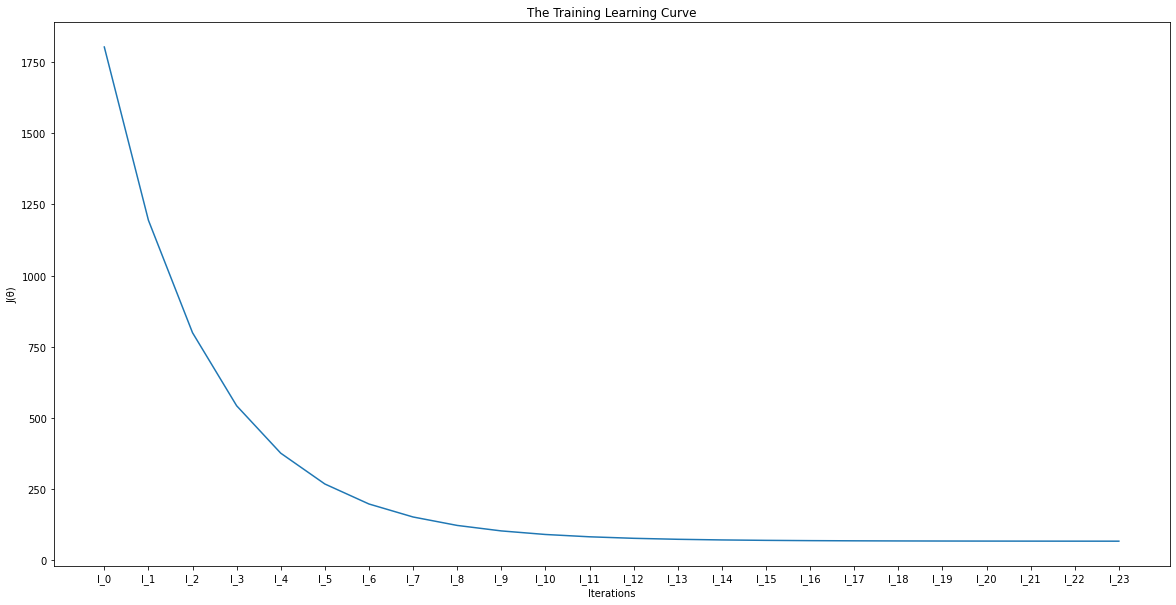

In [9]:
# Plot Training Learning Curve
Y1=[x for x in cost_dict.values()]

X1=[x for x in cost_dict.keys()]

fig = plt.figure(figsize=[20, 10])
plt.xlabel('Iterations')
plt.ylabel('J(θ)')
plt.title('The Training Learning Curve')
plt.plot(X1,Y1, color='tab:blue')


# Model Validation   <a id='validation'></a> 

As described in the previous section, we can use learning curves to debug our model. Our learning curve seems all right, and its shape is just as expected. But we still need to validate our model. To do that, we have already split our data into training and validation datasets before training starts since, for validation, we must use data that has never been used in the training process.

We will use the following  $\theta$ vector, calculated in the [Model Training](#training) section:

$\boldsymbol{\theta}: [\theta_0 = 2.03692557 \text{, }  \theta_1 = 1.13926025\text{, } \theta_2 = 1.14289218\text{, } \theta_3 = 6.02902784\text{, } \theta_4 = 6.60181418\text{, } \theta_5 = 6.82324225\text{, } \theta_6 = 1.20521232 \text{, } \theta_7 = 1.25048269]$

In [10]:
print("\n \033[1m θ\033[0m: {}\n".format(theta))

# calculate the cost value for the test set
cost_test = J(X_valid, y_valid, theta)
print("Cost of test data: {}".format(cost_test))


  θ: [2.03692557 1.13926025 1.14289218 6.02902784 6.60181418 6.82324225
 1.20521232 1.25048269]

Cost of test data: 76.48149798139413


The cost of the validation dataset seems slightly bigger (worse) than the training dataset, which is expected. We can also see the validation results below:

In [11]:
result = pd.DataFrame(index=X_valid.index)
result['Actual CoA'] = y_valid
result['Predicted CoA'] = h(X_valid, theta)
result.head()

,Actual CoA,Predicted CoA
90,64.0,70.687762
254,85.0,89.177016
283,80.0,60.641830
445,91.0,99.983114
461,68.0,52.698085


# Conclusion   <a id='conclusion'></a> 

In this notebook, we have written the hypothesis, cost function, and gradient descent algorithms in Python with a vectorization method for a multivariate Linear Regression task. We have also normalized a portion of our data, trained a Linear Regression model, and validated it by splitting our data.

We set the learning rate high and the convergence threshold low for demonstration purposes, resulting in a learning cost of approximately 66 and a validation cost of roughly 76. This cost is somewhat high, which can be easily seen by checking the predicted and actual ***Chance of Admit*** values. By playing with the learning rate and threshold values, we can get a training cost value smaller than 20, resulting in better predictions. 

Please feel free to correct me if I've made mistakes, and also, if you need help implementing the code, just let me know via the comments. I will try to answer as soon as possible.

Thank you for reading!

# References   <a id='references'></a>
* [Machine Learning Specialization - Deeplearning.AI](https://www.deeplearning.ai/program/machine-learning-specialization/)
* [Andrew Ng](https://en.wikipedia.org/wiki/Andrew_Ng)
* [@Mohan S Acharya](https://www.kaggle.com/mohansacharya)
* [10-simple-hacks-to-speed-up-your-data-analysis - Parul Pandey](https://www.kaggle.com/parulpandey/10-simple-hacks-to-speed-up-your-data-analysis)
* [Univariate Linear Regression From Scratch - Kaggle](https://www.kaggle.com/code/erkanhatipoglu/univariate-linear-regression-from-scratch)
* [Univariate Linear Regression From Scratch - Towards AI](https://pub.towardsai.net/univariate-linear-regression-from-scratch-68065fe8eb09)
* [Multivariate Linear Regression From Scratch - Towards AI](https://medium.com/towards-artificial-intelligence/multivariate-linear-regression-from-scratch-c6702e26cce0https://medium.com/towards-artificial-intelligence/multivariate-linear-regression-from-scratch-c6702e26cce0)
* [Towards AI](https://pub.towardsai.net/)